In [803]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

from sklearn.utils import resample


In [342]:
np.random.seed(42)
df = pd.read_csv("datos_accidentes_cerebrovasculares.csv")

In [343]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [344]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [345]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: >

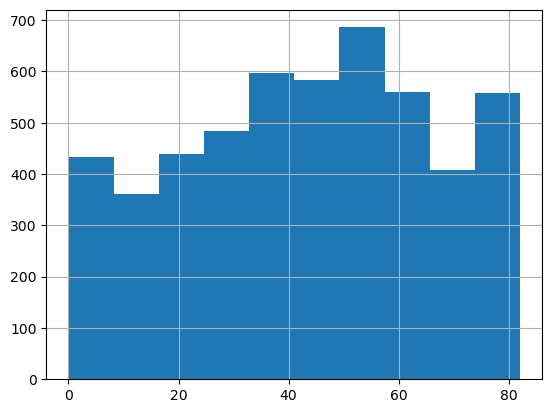

In [346]:
df.age.hist()

In [347]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [348]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [349]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<Axes: >

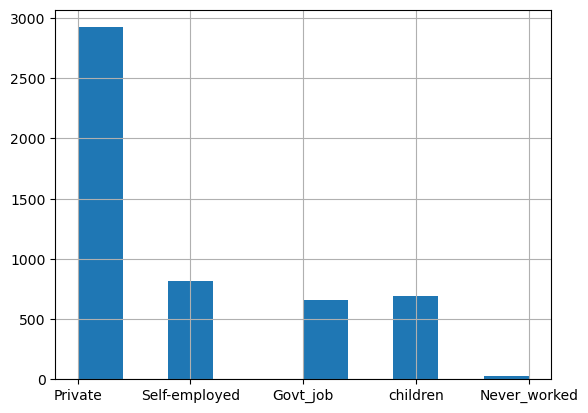

In [350]:
print(df.work_type.value_counts())
df.work_type.hist()

In [351]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [352]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: >

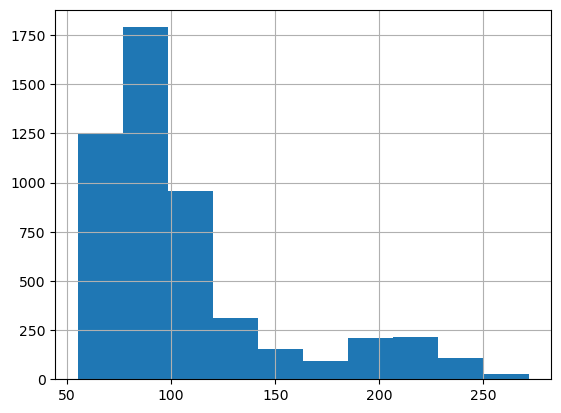

In [353]:
df.avg_glucose_level.hist()

In [354]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<Axes: >

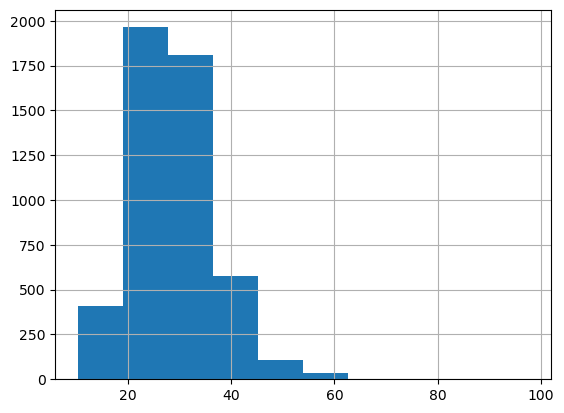

In [355]:
df.bmi.hist()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<Axes: >

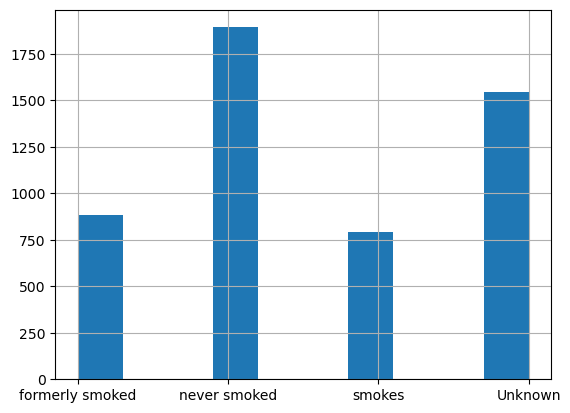

In [356]:
print(df.smoking_status.value_counts())
df.smoking_status.hist()

In [357]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [358]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [359]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [360]:
df.gender = df.gender.astype('category')
df.age = df.age.astype('int64')
df.hypertension = df.hypertension.astype('bool')
df.heart_disease = df.heart_disease.astype('bool')
df.work_type = df.work_type.astype('category')
df.Residence_type = df.Residence_type.astype('category')
df.avg_glucose_level = df.avg_glucose_level.astype('float64')
df.bmi = df.bmi.astype('float64')
df.smoking_status = df.smoking_status.astype('category')
df.stroke = df.stroke.astype('bool')

Eliminamos el id, ya que es una columna que obviamente no aporta ningun valor

In [361]:
df.drop('id', axis=1, inplace=True)

Ya que Residence_type solo tiene 2 clases, se transformará la variable a un booleano

In [362]:
df.Residence_type.replace('Urban', 1, inplace=True)
df.Residence_type.replace('Rural', 0, inplace=True)
df.Residence_type = df.Residence_type.astype('bool')

Lo mismo con ever_married

In [363]:
df.ever_married.replace('Yes', 1, inplace=True)
df.ever_married.replace('No', 0, inplace=True)
df.ever_married = df.ever_married.astype('bool')
df.ever_married

0       True
1       True
2       True
3       True
4       True
        ... 
5105    True
5106    True
5107    True
5108    True
5109    True
Name: ever_married, Length: 5110, dtype: bool

In [364]:
df.ever_married.value_counts()

True     3353
False    1757
Name: ever_married, dtype: int64

In [365]:
df.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [366]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [367]:
imputer = SimpleImputer(strategy='mean')
df.bmi = imputer.fit_transform(df['bmi'].values.reshape(-1,1))

<Axes: >

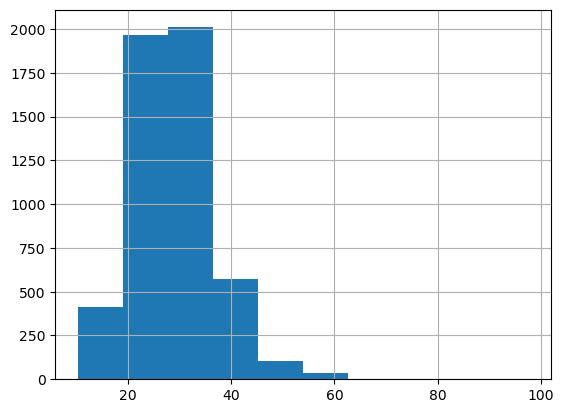

In [368]:
df.bmi.hist()

In [369]:
encoder = OneHotEncoder()
gender_encoded = encoder.fit_transform(df.gender.values.reshape(-1,1)).toarray()
gender_df = pd.DataFrame(gender_encoded, columns=encoder.categories_[0])
gender_df = gender_df.astype('bool')
gender_df.dtypes

Female    bool
Male      bool
Other     bool
dtype: object

In [370]:
encoder = OneHotEncoder()
work_type_encoded = encoder.fit_transform(df.work_type.values.reshape(-1,1)).toarray()
work_df = pd.DataFrame(work_type_encoded, columns=encoder.categories_[0])
work_df = work_df.astype('bool')
work_df

,Govt_job,Never_worked,Private,Self-employed,children
0,False,False,True,False,False
1,False,False,False,True,False
2,False,False,True,False,False
3,False,False,True,False,False
4,False,False,False,True,False
...,...,...,...,...,...
5105,False,False,True,False,False
5106,False,False,False,True,False
5107,False,False,False,True,False
5108,False,False,True,False,False


In [371]:
encoder = OneHotEncoder()
smoking_status_encoded = encoder.fit_transform(df.smoking_status.values.reshape(-1,1)).toarray()
smoking_df = pd.DataFrame(smoking_status_encoded, columns=encoder.categories_[0])
smoking_df = smoking_df.astype('bool')
smoking_df

,Unknown,formerly smoked,never smoked,smokes
0,False,True,False,False
1,False,False,True,False
2,False,False,True,False
3,False,False,False,True
4,False,False,True,False
...,...,...,...,...
5105,False,False,True,False
5106,False,False,True,False
5107,False,False,True,False
5108,False,True,False,False


In [372]:
transformed_df = df.copy()
transformed_df = pd.concat([transformed_df, gender_df, work_df, smoking_df], axis=1)
transformed_df.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)
transformed_df.dtypes

age                    int64
hypertension            bool
heart_disease           bool
ever_married            bool
Residence_type          bool
avg_glucose_level    float64
bmi                  float64
stroke                  bool
Female                  bool
Male                    bool
Other                   bool
Govt_job                bool
Never_worked            bool
Private                 bool
Self-employed           bool
children                bool
Unknown                 bool
formerly smoked         bool
never smoked            bool
smokes                  bool
dtype: object

In [373]:
scaler = MinMaxScaler()
age_scaled = scaler.fit_transform(df.age.values.reshape(-1,1))
age_scaled_df = pd.DataFrame(age_scaled, columns=['age_scaled'])
age_scaled_df

,age_scaled
0,0.817073
1,0.743902
2,0.975610
3,0.597561
4,0.963415
...,...
5105,0.975610
5106,0.987805
5107,0.426829
5108,0.621951


In [374]:
scaler = MinMaxScaler()
glucose_scaled = scaler.fit_transform(df.avg_glucose_level.values.reshape(-1,1))
avg_glucose_df = pd.DataFrame(glucose_scaled, columns=['glucose_scaled'])
avg_glucose_df

,glucose_scaled
0,0.801265
1,0.679023
2,0.234512
3,0.536008
4,0.549349
...,...
5105,0.132167
5106,0.323516
5107,0.128658
5108,0.513203


In [375]:
scaler = MinMaxScaler()
bmi_scaled = scaler.fit_transform(df.bmi.values.reshape(-1,1))
bmi_scaled_df = pd.DataFrame(bmi_scaled, columns=['bmi_scaled'])
bmi_scaled_df

,bmi_scaled
0,0.301260
1,0.212981
2,0.254296
3,0.276060
4,0.156930
...,...
5105,0.212981
5106,0.340206
5107,0.232532
5108,0.175258


In [376]:
final_df = pd.concat([transformed_df, age_scaled_df, avg_glucose_df, bmi_scaled_df], axis = 1)
final_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)
final_df

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,glucose_scaled,bmi_scaled
0,False,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.817073,0.801265,0.301260
1,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.743902,0.679023,0.212981
2,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,0.975610,0.234512,0.254296
3,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,True,0.597561,0.536008,0.276060
4,True,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.963415,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,0.975610,0.132167,0.212981
5106,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.987805,0.323516,0.340206
5107,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,0.426829,0.128658,0.232532
5108,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.621951,0.513203,0.175258


In [377]:
final_df

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,glucose_scaled,bmi_scaled
0,False,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.817073,0.801265,0.301260
1,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.743902,0.679023,0.212981
2,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,0.975610,0.234512,0.254296
3,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,True,0.597561,0.536008,0.276060
4,True,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.963415,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,0.975610,0.132167,0.212981
5106,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.987805,0.323516,0.340206
5107,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,0.426829,0.128658,0.232532
5108,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.621951,0.513203,0.175258


<Axes: >

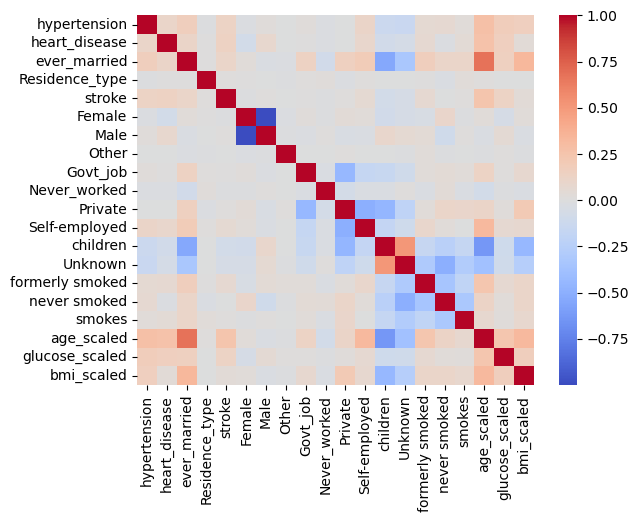

In [378]:
import seaborn as sns

sns.heatmap(final_df.corr(), cmap='coolwarm', fmt=".2f")

In [379]:
final_df

,hypertension,heart_disease,ever_married,Residence_type,stroke,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,glucose_scaled,bmi_scaled
0,False,True,True,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.817073,0.801265,0.301260
1,False,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.743902,0.679023,0.212981
2,False,True,True,False,True,False,True,False,False,False,True,False,False,False,False,True,False,0.975610,0.234512,0.254296
3,False,False,True,True,True,True,False,False,False,False,True,False,False,False,False,False,True,0.597561,0.536008,0.276060
4,True,False,True,False,True,True,False,False,False,False,False,True,False,False,False,True,False,0.963415,0.549349,0.156930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,True,False,True,True,False,True,False,False,False,False,True,False,False,False,False,True,False,0.975610,0.132167,0.212981
5106,False,False,True,True,False,True,False,False,False,False,False,True,False,False,False,True,False,0.987805,0.323516,0.340206
5107,False,False,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,0.426829,0.128658,0.232532
5108,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,0.621951,0.513203,0.175258


In [380]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [381]:
final_df_up = resample(final_df, replace=True, n_samples=5000, random_state=SEED_VALUE)

final_df = pd.concat([final_df, final_df_up])

In [382]:
SEED_VALUE=1

final_df_train, final_df_test = train_test_split(
    final_df,
    test_size=0.2,
    random_state=SEED_VALUE,
    stratify=final_df['stroke']
)

In [383]:
final_df_train_Y = final_df_train.loc[:, 'stroke']
final_df_test_Y = final_df_test.loc[:, 'stroke']

In [384]:
final_df_train = final_df_train.drop('stroke', axis=1)
final_df_test = final_df_test.drop('stroke', axis=1)

In [385]:
scaler = StandardScaler()
scaler.fit(final_df_train)
final_df_train_scaled = scaler.transform(final_df_train)
final_df_test_scaled = scaler.transform(final_df_test)

In [386]:
final_df_train

,hypertension,heart_disease,ever_married,Residence_type,Female,Male,Other,Govt_job,Never_worked,Private,Self-employed,children,Unknown,formerly smoked,never smoked,smokes,age_scaled,glucose_scaled,bmi_scaled
2690,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,0.926829,0.732527,0.134021
581,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,0.219512,0.589696,0.122566
3159,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,0.914634,0.247438,0.216495
4878,False,False,False,False,False,True,False,False,False,False,False,True,True,False,False,False,0.195122,0.126119,0.255441
4382,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0.195122,0.238574,0.120275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,0.341463,0.116702,0.540664
2283,False,True,True,False,False,True,False,False,False,True,False,False,False,False,True,False,0.780488,0.128197,0.219931
1656,False,False,True,True,False,True,False,False,False,True,False,False,False,True,False,False,0.646341,0.118595,0.328751
2789,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,0.487805,0.479226,0.240550


In [387]:
hyperparameters_knn = {'n_neighbors': range(1, 100, 1)}

In [388]:
k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters_knn,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


# Ejecutamos el entrenamiento
np.random.seed(SEED_VALUE)
# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV.fit(final_df_train_scaled, final_df_train_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100)}, return_train_score=True,
             scoring='recall')

In [389]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
0,1,0.6700,0.029155,1
2,3,0.2825,0.030208,2
1,2,0.2450,0.045139,3
4,5,0.1425,0.020310,4
3,4,0.1125,0.020917,5
...,...,...,...,...
43,44,0.0000,0.000000,22
41,42,0.0000,0.000000,22
40,41,0.0000,0.000000,22
48,49,0.0000,0.000000,22


In [390]:
best_model_knn= modelCV.best_estimator_

In [391]:
knn_predict=best_model_knn.predict(final_df_test_scaled)

In [392]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=knn_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[1894   28]
 [  21   79]]


# Random Forest

In [792]:
hyperparameters_rf = {'n_estimators': range(1, 150, 1)}

In [794]:
rf = RandomForestClassifier()
modelCV = GridSearchCV(rf,
                       hyperparameters_rf,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


# Ejecutamos el entrenamiento
np.random.seed(SEED_VALUE)
# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV.fit(final_df_train_scaled, final_df_train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': range(1, 150)},
             return_train_score=True, scoring='recall')

In [795]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_estimators', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_estimators,mean_test_score,std_test_score,rank_test_score
74,75,1.000000,0.000000,1
95,96,1.000000,0.000000,1
96,97,1.000000,0.000000,1
97,98,1.000000,0.000000,1
98,99,1.000000,0.000000,1
...,...,...,...,...
52,53,1.000000,0.000000,1
53,54,1.000000,0.000000,1
46,47,1.000000,0.000000,1
1,2,0.998458,0.001889,148


In [796]:
best_model_rf= modelCV.best_estimator_

In [798]:
rf_predict=best_model_rf.predict(final_df_test_scaled)

In [799]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rf_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[918  54]
 [  0 973]]


# Regresion logistica

In [820]:
hyperparameters_rl = {'C': [0.001, 0.01, 0.1, 1, 10]}

In [821]:
rl = LogisticRegression()
modelCV = GridSearchCV(rl,
                       hyperparameters_rl,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


# Ejecutamos el entrenamiento
np.random.seed(SEED_VALUE)
# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV.fit(final_df_train_scaled, final_df_train_Y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall')

In [822]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
1,0.01,0.822538,0.017440,1
2,0.1,0.822020,0.018938,2
3,1,0.819450,0.020630,3
4,10,0.819450,0.020630,3
0,0.001,0.811477,0.014008,5


In [824]:
best_model_rl= modelCV.best_estimator_

In [826]:
rl_predict=best_model_rl.predict(final_df_test_scaled)

In [827]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rl_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[708 264]
 [167 806]]


# SVC

In [845]:
c = [10**i for i in range(0, 4, 1)]
hyperparameters_svc = {
    
    'C': c
}

In [846]:
svc = SVC(random_state = SEED_VALUE)
modelCV = GridSearchCV(
    svc,
    hyperparameters_svc,
    cv=5,
    scoring='recall',#recall acuerdate memo
    return_train_score=True,
    n_jobs=-1
    )



modelCV.fit(final_df_train_scaled, final_df_train_Y)

GridSearchCV(cv=5, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000]}, return_train_score=True,
             scoring='recall')

In [847]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
3,1000,0.979425,0.004595,1
2,100,0.965534,0.005177,2
1,10,0.949078,0.008535,3
0,1,0.898413,0.013286,4


In [848]:
best_model_svc= modelCV.best_estimator_

In [849]:
svc_predict=best_model_rl.predict(final_df_test_scaled)

In [851]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=svc_predict)
print('La matriz de confusión del SVC es: \n{}'.format(matriz))

La matriz de confusión del SVC es: 
[[708 264]
 [167 806]]


In [855]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(final_df_test_Y, svc_predict)
recall = recall_score(final_df_test_Y, svc_predict)
f1 = f1_score(final_df_test_Y, svc_predict)
accuracy = accuracy_score(final_df_test_Y, svc_predict)
print('La precisión es del SVC: {}'.format(precision))
print('El recall es del SVC: {}'.format(recall))
print('El f1-score es del SVC: {}'.format(f1))
print('La accuracy es del SVC: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, rf_predict)
recall = recall_score(final_df_test_Y, rf_predict)
f1 = f1_score(final_df_test_Y, rf_predict)
accuracy = accuracy_score(final_df_test_Y, rf_predict)
print('La precisión es del RF: {}'.format(precision))
print('El recall es del RF: {}'.format(recall))
print('El f1-score es del RF: {}'.format(f1))
print('La accuracy es del RF: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, knn_predict)
recall = recall_score(final_df_test_Y, knn_predict)
f1 = f1_score(final_df_test_Y, knn_predict)
accuracy = accuracy_score(final_df_test_Y, knn_predict)
print('La precisión es del KNN: {}'.format(precision))
print('El recall es del KNN: {}'.format(recall))
print('El f1-score es del :KNN {}'.format(f1))
print('La accuracy es del KNN: {}'.format(accuracy))

precision = precision_score(final_df_test_Y, rl_predict)
recall = recall_score(final_df_test_Y, rl_predict)
f1 = f1_score(final_df_test_Y, rl_predict)
accuracy = accuracy_score(final_df_test_Y, rl_predict)
print('La precisión es del RL: {}'.format(precision))
print('El recall es del RL: {}'.format(recall))
print('El f1-score es del RL: {}'.format(f1))
print('La accuracy es del RL: {}'.format(accuracy))

La precisión es del SVC: 0.7532710280373832
El recall es del SVC: 0.828365878725591
El f1-score es del SVC: 0.7890357317670094
La accuracy es del SVC: 0.7784061696658098
La precisión es del RF: 0.9474196689386563
El recall es del RF: 1.0
El f1-score es del RF: 0.973
La accuracy es del RF: 0.9722365038560411
La precisión es del KNN: 0.952054794520548
El recall es del KNN: 1.0
El f1-score es del :KNN 0.9754385964912281
La accuracy es del KNN: 0.9748071979434447
La precisión es del RL: 0.7532710280373832
El recall es del RL: 0.828365878725591
El f1-score es del RL: 0.7890357317670094
La accuracy es del RL: 0.7784061696658098


In [857]:
from sklearn.metrics import auc, roc_curve
fpr_svc, tpr_svc, thresholds = roc_curve(final_df_test_Y, svc_predict, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(final_df_test_Y, rf_predict, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(final_df_test_Y, knn_predict, pos_label=1)
fpr_rl, tpr_rl, thresholds = roc_curve(final_df_test_Y, rl_predict, pos_label=1)

In [858]:
print('El área bajo la curva es del SVC: {}'.format(auc(fpr_svc, tpr_svc)))
print('El área bajo la curva es del RF: {}'.format(auc(fpr_rf, tpr_rf)))
print('El área bajo la curva es del KNN: {}'.format(auc(fpr_knn, tpr_knn)))
print('El área bajo la curva es del DT: {}'.format(auc(fpr_rl, tpr_rl)))

El área bajo la curva es del SVC: 0.7783804702269931
El área bajo la curva es del RF: 0.9722222222222222
El área bajo la curva es del KNN: 0.9747942386831276
El área bajo la curva es del DT: 0.7783804702269931


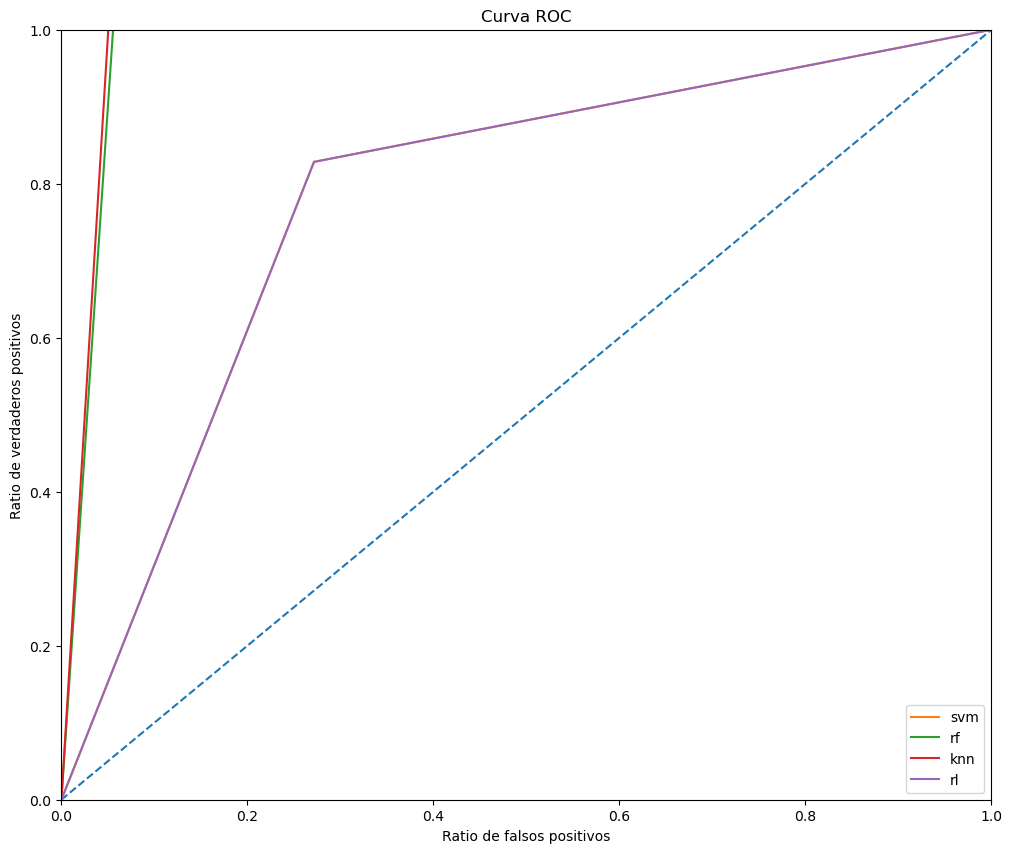

In [859]:
import matplotlib.pyplot as plt
# Crear figura
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Pintar la diagonal
ax.plot([0,1],[0,1],ls='--')

# Pintar los ejes
ax.set_xlabel('Ratio de falsos positivos')
ax.set_ylabel('Ratio de verdaderos positivos')
ax.set_title('Curva ROC')

# Delimitar los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintar la curva
ax.plot(fpr_svc, tpr_svc, label='svm')
ax.plot(fpr_rf, tpr_rf, label='rf')
ax.plot(fpr_knn, tpr_knn, label='knn')
ax.plot(fpr_rl, tpr_rl, label='rl')

# Mostrar plot
ax.legend(loc='lower right')
plt.show()